In [12]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
yelp_data = pd.read_csv('chicago_four_signs.csv')
zillow_neighborhood_data = gpd.read_file('/Volumes/data/zillow-neighborhoods_real.geojson')

In [5]:
chicago = zillow_neighborhood_data.loc[zillow_neighborhood_data['city'] == 'Chicago']

In [6]:
yelp_data_tidy = yelp_data[['name','coordinates']]

In [7]:
yelp_data_tidy['coordinates'][0]

"{'latitude': 41.9134194160823, 'longitude': -87.6482384681229}"

Note: Need to figure out how to convert yelp format to a geojson-esque format (tuple)

In [13]:
point = (-87.6482384681229,41.9134194160823)

In [14]:
test_point = Point(point)

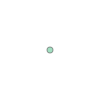

In [15]:
test_point

In [16]:
chi_df = pd.DataFrame(chicago)

In [17]:
chi_df['is_in'] = chi_df['geometry'].apply(lambda x: test_point.within(x))

In [19]:
chi_df['is_in'].value_counts()

False    227
True       1
Name: is_in, dtype: int64

In [20]:
chi_df.loc[chi_df['is_in'] == True]

,city,name,regionid,county,state,geometry,is_in
14322,Chicago,Lincoln Park,269590,Cook,IL,POLYGON ((-87.64824491499995 41.91091002200005...,True
